In [1]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
! ls ..

BERTanalysis		 relexfiles.zip
allrels.csv		 scai_corpus
analysis		 scai_eval
bk_pickles		 scai_res
create_synonym_files.sh  scai_test_results.pickle
database		 scai_test_spacy_bionlp13cg_results.pickle
dbs			 scai_test_spacy_large_results.pickle
hgnc_no_withdrawn.syn	 scai_train_results.pickle
mirtex_benchmark	 scai_train_spacy_bionlp13cg_results.pickle
mongodb			 scai_train_spacy_large_results.pickle
nbs			 server
neutrophils		 sym2ens
plots			 synonymes
prediction		 textdb
pubmed			 textmining
relation_extraction	 utils
relexfiles


In [3]:
trainResults = pickle.load(open("../scai_train_results.pickle", 'rb'))
testResults = pickle.load(open("../scai_test_results.pickle", 'rb'))

trainResultsSpacyLarge = pickle.load(open("../scai_test_spacy_large_results.pickle", 'rb'))
testResultsSpacyLarge = pickle.load(open("../scai_train_spacy_large_results.pickle", 'rb'))

trainResultsSpacyBionlp = pickle.load(open("../scai_test_spacy_bionlp13cg_results.pickle", 'rb'))
testResultsSpacyBionlp = pickle.load(open("../scai_train_spacy_bionlp13cg_results.pickle", 'rb'))


all_runs = {
    ("ProMiner",): {"precision": 0.41, "recall": 0.45},
    ("miRTex",): {"precision": 0.92, "recall": 0.82},
    ("ReLeX",): {"precision": 0.45, "recall": 0.84},
    ("miRSel",): {"precision": 0.55, "recall": 1.0},
    ("miRExplore/atheMir",): {"precision": 0.72, "recall": 0.77},
    
    #('scispacy_large_train',): trainResults[('conj','sdp','compartment','context')],
    ('scispacy_large_test',): testResults[('conj','sdp','compartment','context')],
    
    #('spacy_large_train',): trainResultsSpacyLarge[('conj','sdp','compartment','context')],
    ('spacy_large_test',): testResultsSpacyLarge[('conj','sdp','compartment','context')],
    
    #('spacy_bionlp_train',): trainResultsSpacyBionlp[('conj','sdp','compartment','context')],
    ('spacy_bionlp_test',): testResultsSpacyBionlp[('conj','sdp','compartment','context')],
}

In [4]:
! ls ../scai_eval

results_test_bionlp_bionlp.pickle
results_test_bionlp_bionlp_subseti.pickle
results_test_scilg_bionlp.pickle
results_test_scilg_bionlp_subsetc.pickle
results_test_scilg_bionlp_subseti.pickle
results_test_scilg_scilg.pickle
results_test_spcylg_bionlp.pickle
results_test_spcylg_bionlp_subseti.pickle
results_train_bionlp_bionlp.pickle
results_train_bionlp_bionlp_subseti.pickle
results_train_scilg_bionlp.pickle
results_train_scilg_bionlp_subsetc.pickle
results_train_scilg_bionlp_subseti.pickle
results_train_scilg_scilg.pickle
results_train_spcylg_bionlp.pickle
results_train_spcylg_bionlp_subseti.pickle


In [3]:
results_test_scilg_bionlp = pickle.load(open("../scai_eval/results_test_scilg_bionlp.pickle", 'rb'))
results_train_scilg_bionlp = pickle.load(open("../scai_eval/results_train_scilg_bionlp.pickle", 'rb'))

results_test_bionlp_bionlp = pickle.load(open("../scai_eval/results_test_bionlp_bionlp.pickle", 'rb'))
results_train_bionlp_bionlp = pickle.load(open("../scai_eval/results_train_bionlp_bionlp.pickle", 'rb'))

results_test_scilg_scilg = pickle.load(open("../scai_eval/results_test_scilg_scilg.pickle", 'rb'))
results_train_scilg_scilg = pickle.load(open("../scai_eval/results_train_scilg_scilg.pickle", 'rb'))

results_test_spcylg_bionlp = pickle.load(open("../scai_eval/results_test_spcylg_bionlp.pickle", 'rb'))
results_train_spcylg_bionlp = pickle.load(open("../scai_eval/results_train_spcylg_bionlp.pickle", 'rb'))

results_test_scilg_bionlp_subsetc = pickle.load(open("../scai_eval/results_test_scilg_bionlp_subsetc.pickle", 'rb'))
results_train_scilg_bionlp_subsetc = pickle.load(open("../scai_eval/results_train_scilg_bionlp_subsetc.pickle", 'rb'))

results_test_scilg_bionlp_subseti = pickle.load(open("../scai_eval/results_test_scilg_bionlp_subseti.pickle", 'rb'))
results_train_scilg_bionlp_subseti = pickle.load(open("../scai_eval/results_train_scilg_bionlp_subseti.pickle", 'rb'))

results_test_spcylg_bionlp_subseti = pickle.load(open("../scai_eval/results_test_spcylg_bionlp_subseti.pickle", 'rb'))
results_train_spcylg_bionlp_subseti = pickle.load(open("../scai_eval/results_train_spcylg_bionlp_subseti.pickle", 'rb'))

results_test_bionlp_bionlp_subseti = pickle.load(open("../scai_eval/results_test_bionlp_bionlp_subseti.pickle", 'rb'))
results_train_bionlp_bionlp_subseti = pickle.load(open("../scai_eval/results_train_bionlp_bionlp_subseti.pickle", 'rb'))

#precision 0.926829268292683
#recall 0.8571428571428571
#specificity 0.9090909090909091
#f1 0.890625

test2col = {
    "miRExplore/sci-lg": "#6c05c4",
    "miRExplore/sci-lg (unmod)": "#a669db",
    "miRExplore/BioNLP": "#126199",
    "miRExplore/spacy-lg": "#bd1273",
    "miRExplore/atheMir": "#0e9090",
    "miRSel": "#2397f5",
    "ProMiner": "#fe6d13",
    "miRTex": "#a7abf4",
    "ReLeX": "#dbbd94"
}

all_runs = {
    (("ProMiner",),): {'allruns': {"precision": 0.41, "recall": 0.45}},
    (("miRTex",),): {'allruns': {"precision": 0.92, "recall": 0.82}},
    (("ReLeX",),): {'allruns': {"precision": 0.45, "recall": 0.84}},
    (("miRSel",),): {'allruns': {"precision": 0.55, "recall": 1.0}},
    (("miRExplore/atheMir",),): {'allruns': {"precision": 0.72, "recall": 0.77}},
    (("miRExplore/sci-lg (unmod)",),): {'allruns': {"precision": 0.92, "recall": 0.85}},

    (('miRExplore/sci-lg',),): {'allruns': results_test_scilg_bionlp[(('conj', 'sdp', 'compartment', 'context', 'entity'), ('compartment', 'between', 'counts', 'return'))]["interaction"]},
    (('miRExplore/BioNLP',),): {'allruns': results_test_bionlp_bionlp[(('conj', 'sdp', 'compartment', 'context', 'entity'), ('compartment', 'between', 'counts', 'return'))]["interaction"]},
    (('miRExplore/spacy-lg',),): {'allruns': results_test_spcylg_bionlp[(('conj', 'sdp', 'compartment', 'context', 'entity'), ('compartment', 'between', 'counts', 'return'))]["interaction"]},
}

In [3]:
all_runs

{(('ProMiner',),): {'allruns': {'precision': 0.41, 'recall': 0.45}},
 (('miRTex',),): {'allruns': {'precision': 0.92, 'recall': 0.82}},
 (('ReLeX',),): {'allruns': {'precision': 0.45, 'recall': 0.84}},
 (('miRSel',),): {'allruns': {'precision': 0.55, 'recall': 1.0}},
 (('miRExplore/atheMir',),): {'allruns': {'precision': 0.72, 'recall': 0.77}},
 (('miRExplore/sci-lg',),): {'allruns': {'precision': 0.927536231884058,
   'recall': 0.9624060150375939,
   'specificity': 0.898989898989899,
   'f1': 0.9446494464944649}},
 (('miRExplore/BioNLP',),): {'allruns': {'precision': 0.8043478260869565,
   'recall': 0.8345864661654135,
   'specificity': 0.7272727272727273,
   'f1': 0.8191881918819188}},
 (('miRExplore/spacy-lg',),): {'allruns': {'precision': 0.7463768115942029,
   'recall': 0.8110236220472441,
   'specificity': 0.6666666666666666,
   'f1': 0.7773584905660377}}}

In [5]:
# -*- coding: utf-8 -*-
"""
Script to plot recall-precision values with f-measure equi-potential lines.

Created on Dec 16, 2009

@author: Jörn Hees
"""

import pylab as pl
import itertools as it
import numpy as np

def fmeasure(p, r):
    """Calculates the fmeasure for precision p and recall r."""
    return 2*p*r / (p+r)


def _fmeasureCurve(f, p):
    """For a given f1 value and precision get the recall value.

    The f1 measure is defined as: f(p,r) = 2*p*r / (p + r).

    If you want to plot "equipotential-lines" into a precision/recall diagramm
    (recall (y) over precision (x)), for a given fixed f value we get this
    function by solving for r:
    """
    return f * p / (2 * p - f)


def _plotFMeasures(fstepsize=.1, stepsize=0.001):
    """Plots 10 fmeasure Curves into the current canvas."""
    p = np.arange(0., 1., stepsize)[1:]
    for fi, f in enumerate(np.arange(0., 1., fstepsize)[1:]):
        points = [(x, _fmeasureCurve(f, x)) for x in p
                  if 0 < _fmeasureCurve(f, x) <= 1.5]
        xs, ys = zip(*points)
        curve, = pl.plot(xs, ys, "--", color="gray", linewidth=0.5)  # , label=r"$f=%.1f$"%f) # exclude labels, for legend
        # bad hack:
        # gets the 10th last datapoint, from that goes a bit to the left, and a bit down
        shiftf = ((1+fi) % 2) if fi < 8 else 0
        pl.annotate(r"$F_1=%.1f$" % f, xy=(ys[-10], xs[-10]), xytext=(ys[-10]+ fi*0.002, xs[-10] - (shiftf*0.035)), size=12, color="gray")

# def _contourPlotFMeasure():
#    delta = 0.01
#    x = np.arange(0.,1.,delta)
#    y = np.arange(0.,1.,delta)
#    X,Y = np.meshgrid(x,y)
#    cs = pl.contour(X,Y,fmeasure,np.arange(0.1,1.0,0.1)) # FIXME: make an array out of fmeasure first
#    pl.clabel(cs, inline=1, fontsize=10)



# # if you don't believe the prime loop:
# icons = set()
# for i,j in it.izip(it.cycle(colors),it.cycle(markers)):
#    if (i,j) in icons: break
#    icons.add((i,j))
# print len(icons), len(colors)*len(markers)


def plotPrecisionRecallDiagram(title="title", points=None, labels=None, loc="center right", sortedEntries=False, test2color=None, fontsizes={'ticks': 10,'title': 14, 'labels':12, 'legend': 12}):
    """Plot (precision,recall) values with 10 f-Measure equipotential lines.

    Plots into the current canvas.
    Points is a list of (precision,recall) pairs.
    Optionally you can also provide labels (list of strings), which will be
    used to create a legend, which is located at loc.
    """
    
    if fontsizes is None:
        fontsizes = {'ticks': 10,'title': 14, 'label':12, 'legend': 10, "dot": 50}
    
    if labels:
        ax = pl.axes([0.1, 0.1, 0.7, 0.8])  # llc_x, llc_y, width, height
    else:
        ax = pl.gca()
    pl.title(title)

    _plotFMeasures()
    
    ax.set_title(title, fontsize=fontsizes["title"])
    ax.set_xlabel('Precision', fontsize = fontsizes["label"])
    ax.set_ylabel('Recall', fontsize = fontsizes["label"])
    plt.xticks(fontsize=fontsizes["ticks"])
    plt.yticks(fontsize=fontsizes["ticks"])

    # _contourPlotFMeasure()
    
    colors = "bgrcmyk"  # 7 is a prime, so we'll loop over all combinations of colors and markers, when zipping their cycles
    markers = "so^>v<dph8"  # +x taken out, as no color.
    
    outputTableList = []

    if points:
        
        pointlabels = [x for x in zip(points, labels)]
        
        if sortedEntries:
            pointlabels = sorted(pointlabels, key=lambda x: x[1].upper())

        scps = []  # scatter points
        for i, ((x, y, f1), label) in enumerate(pointlabels):

            print(i, x, y, f1, label)
            outputTableList.append( (label, x, y, f1) )
            
            fcolor = test2color[label] if not test2color is None else colors[i % len(colors)]
            
            scp = ax.scatter(x, y, label=label, s=fontsizes["dot"], linewidths=0.75, facecolor=fcolor, alpha=0.75, marker=markers[i % len(markers)])
            scps.append(scp)
            # pl.plot(x,y, label=label, marker=getMarker(), markeredgewidth=0.75, markerfacecolor=getColor())
            # if labels: pl.text(x, y, label, fontsize="x-small")
            
        
            
        if labels:
            llabels = [x[1] for x in pointlabels]
            # pl.legend(scps, labels, loc=loc, scatterpoints=1, numpoints=1, fancybox=True) # passing scps & labels explicitly to work around a bug with legend seeming to miss out the 2nd scatterplot
            pl.legend(scps, llabels, loc=(1.01, 0), scatterpoints=1, numpoints=1, fancybox=True,fontsize=fontsizes["legend"])  # passing scps & labels explicitly to work around a bug with legend seeming to miss out the 2nd scatterplot
    pl.axis([-0.02, 1.02, -0.02, 1.02])  # xmin, xmax, ymin, ymax
    

    
    outputTableList.insert(0, ("Rules enabled", "Precision", "Recall", "$F_1$"))
    
    print("\\begin{table}")
    print("\\begin{tabular}{@{}lrrr@{}}")
    
    print("\\toprule")
    print("&".join(["\\textbf{{{x}}}".format(x=x) for x in outputTableList[0]]) + "\\\\ \midrule")
    
    for res in outputTableList[1:]:
        print("&".join([res[0]] + ["{0:0.3f}".format(x) for x in res[1:]]) + "\\\\")
    
    print("\\end{tabular}")
    print("\\end{table}")

def plot_results(inres, title, slot, test2color=None, figsize=(10,8), fontsizes=None, sortedEntries=False):
    
    plt.figure(figsize=figsize)
    
    prList = []
    labels = []
    
    for x in inres:
        
        runres = inres[x][slot]
                                
        prec = runres["precision"]
        recall = runres["recall"]
        
        if "f1" in runres:
            f1 = runres["f1"]
        else:
            f1 = 2* prec * recall / (prec+recall)
        
        labels.append(";".join(x[0]))
        
        prList.append((prec, recall, f1))

    plotPrecisionRecallDiagram(title, prList, labels, test2color=test2color, fontsizes=fontsizes, sortedEntries=sortedEntries)
    
    titlename = title.lower()
    
    for x in [",", "(", ")"]:
        titlename = titlename.replace(x, "")
        
    
    titlename = "_".join(titlename.split())
    
    plt.savefig(titlename + ".png", bbox_inches="tight")
    plt.savefig(titlename + ".pdf", bbox_inches="tight")
        
    plt.show()
    plt.close()

<ipython-input-5-f54f4b448d8b>:28: RuntimeWarning: divide by zero encountered in double_scalars
  return f * p / (2 * p - f)


0 0.72 0.77 0.7441610738255033 miRExplore/atheMir
1 0.8043478260869565 0.8345864661654135 0.8191881918819188 miRExplore/BioNLP
2 0.927536231884058 0.9624060150375939 0.9446494464944649 miRExplore/sci-lg
3 0.92 0.85 0.8836158192090395 miRExplore/sci-lg (unmod)
4 0.7463768115942029 0.8110236220472441 0.7773584905660377 miRExplore/spacy-lg
5 0.55 1.0 0.7096774193548387 miRSel
6 0.92 0.82 0.8671264367816092 miRTex
7 0.41 0.45 0.4290697674418605 ProMiner
8 0.45 0.84 0.586046511627907 ReLeX
\begin{table}
\begin{tabular}{@{}lrrr@{}}
\toprule
\textbf{Rules enabled}&\textbf{Precision}&\textbf{Recall}&\textbf{$F_1$}\\ \midrule
miRExplore/atheMir&0.720&0.770&0.744\\
miRExplore/BioNLP&0.804&0.835&0.819\\
miRExplore/sci-lg&0.928&0.962&0.945\\
miRExplore/sci-lg (unmod)&0.920&0.850&0.884\\
miRExplore/spacy-lg&0.746&0.811&0.777\\
miRSel&0.550&1.000&0.710\\
miRTex&0.920&0.820&0.867\\
ProMiner&0.410&0.450&0.429\\
ReLeX&0.450&0.840&0.586\\
\end{tabular}
\end{table}


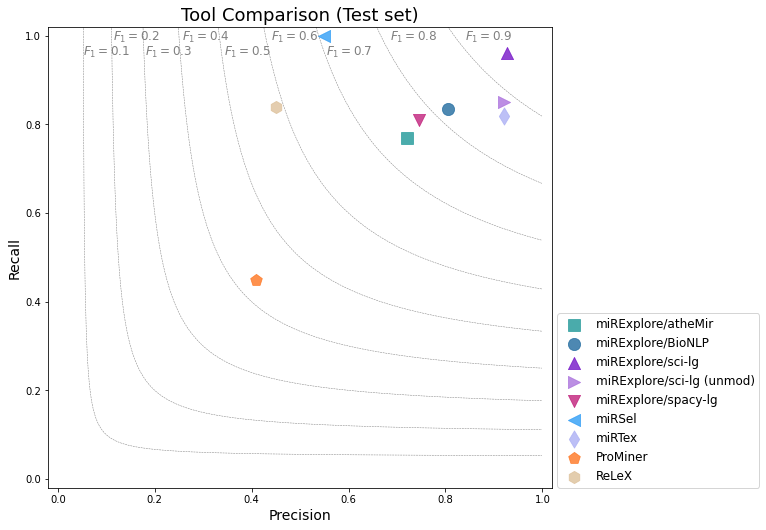

In [6]:
tools_fontsizes = {'ticks': 10,'title': 18, 'label':14, 'legend': 12, "dot": 150}

plot_results(all_runs, "Tool Comparison (Test set)", "allruns", figsize=(10,8), sortedEntries=True, test2color = test2col, fontsizes=tools_fontsizes)

<ipython-input-82-f54f4b448d8b>:28: RuntimeWarning: divide by zero encountered in double_scalars
  return f * p / (2 * p - f)


0 0.72 0.77 0.7441610738255033 miRExplore/atheMir
1 0.8043478260869565 0.8345864661654135 0.8191881918819188 miRExplore/BioNLP
2 0.927536231884058 0.9624060150375939 0.9446494464944649 miRExplore/sci-lg
3 0.7463768115942029 0.8110236220472441 0.7773584905660377 miRExplore/spacy-lg
4 0.55 1.0 0.7096774193548387 miRSel
5 0.92 0.82 0.8671264367816092 miRTex
6 0.41 0.45 0.4290697674418605 ProMiner
7 0.45 0.84 0.586046511627907 ReLeX
\begin{table}
\begin{tabular}{@{}lrrr@{}}
\toprule
\textbf{Rules enabled}&\textbf{Precision}&\textbf{Recall}&\textbf{$F_1$}\\ \midrule
miRExplore/atheMir&0.720&0.770&0.744\\
miRExplore/BioNLP&0.804&0.835&0.819\\
miRExplore/sci-lg&0.928&0.962&0.945\\
miRExplore/spacy-lg&0.746&0.811&0.777\\
miRSel&0.550&1.000&0.710\\
miRTex&0.920&0.820&0.867\\
ProMiner&0.410&0.450&0.429\\
ReLeX&0.450&0.840&0.586\\
\end{tabular}
\end{table}


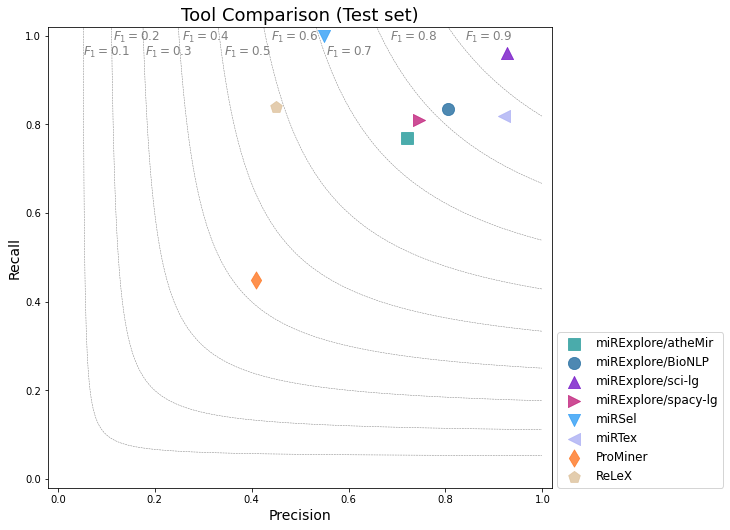

In [83]:
tools_fontsizes = {'ticks': 10,'title': 18, 'label':14, 'legend': 12, "dot": 150}

plot_results(all_runs, "Tool Comparison (Test set)", "allruns", figsize=(10,8), sortedEntries=True, test2color = test2col, fontsizes=tools_fontsizes)

In [9]:
[x for x in results_train_scilg_bionlp_subseti]

[((), ('compartment', 'between', 'counts', 'return')),
 (('conj',), ('compartment', 'between', 'counts', 'return')),
 (('sdp',), ('compartment', 'between', 'counts', 'return')),
 (('compartment',), ('compartment', 'between', 'counts', 'return')),
 (('context',), ('compartment', 'between', 'counts', 'return')),
 (('entity',), ('compartment', 'between', 'counts', 'return')),
 (('conj', 'sdp'), ('compartment', 'between', 'counts', 'return')),
 (('conj', 'compartment'), ('compartment', 'between', 'counts', 'return')),
 (('conj', 'context'), ('compartment', 'between', 'counts', 'return')),
 (('conj', 'entity'), ('compartment', 'between', 'counts', 'return')),
 (('sdp', 'compartment'), ('compartment', 'between', 'counts', 'return')),
 (('sdp', 'context'), ('compartment', 'between', 'counts', 'return')),
 (('sdp', 'entity'), ('compartment', 'between', 'counts', 'return')),
 (('compartment', 'context'), ('compartment', 'between', 'counts', 'return')),
 (('compartment', 'entity'), ('compartment

In [79]:
rules_fontsizes = {'ticks': 10,'title': 18, 'label':14, 'legend': 10, "dot": 75}

<ipython-input-82-f54f4b448d8b>:28: RuntimeWarning: divide by zero encountered in double_scalars
  return f * p / (2 * p - f)


0 1.0 0.48866498740554154 0.6565143824027072 
1 0.9690721649484536 0.5295774647887324 0.6848816029143898 conj
2 1.0 0.5173333333333333 0.6818980667838314 sdp
3 0.9845360824742269 0.6303630363036303 0.7686116700201208 compartment
4 0.9587628865979382 0.636986301369863 0.7654320987654322 context
5 0.9896907216494846 0.4860759493670886 0.6519524617996605 entity
6 0.9690721649484536 0.562874251497006 0.7121212121212122 conj;sdp
7 0.9587628865979382 0.6940298507462687 0.8051948051948052 conj;compartment
8 0.9329896907216495 0.6703703703703704 0.7801724137931035 conj;context
9 0.9587628865979382 0.5269121813031161 0.680073126142596 conj;entity
10 0.9845360824742269 0.6701754385964912 0.7974947807933195 sdp;compartment
11 0.9587628865979382 0.6595744680851063 0.7815126050420167 sdp;context
12 0.9896907216494846 0.514745308310992 0.6772486772486773 sdp;entity
13 0.9432989690721649 0.8026315789473685 0.8672985781990522 compartment;context
14 0.9742268041237113 0.627906976744186 0.76363636363636

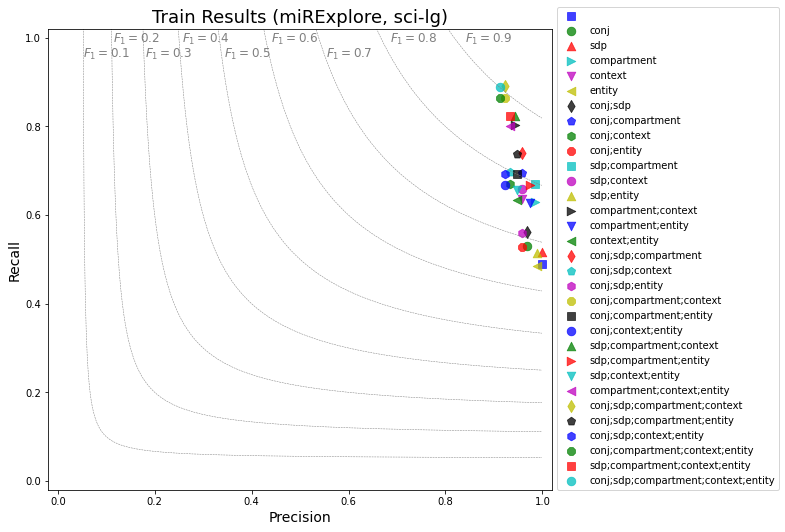

In [84]:
plot_results(results_train_scilg_bionlp_subseti, "Train Results (miRExplore, sci-lg)", "interaction", fontsizes=rules_fontsizes)

<ipython-input-82-f54f4b448d8b>:28: RuntimeWarning: divide by zero encountered in double_scalars
  return f * p / (2 * p - f)


0 1.0 0.5948275862068966 0.745945945945946 
1 0.9565217391304348 0.673469387755102 0.7904191616766467 conj
2 1.0 0.6052631578947368 0.7540983606557378 sdp
3 0.9855072463768116 0.7431693989071039 0.8473520249221185 compartment
4 0.9782608695652174 0.6521739130434783 0.7826086956521738 context
5 1.0 0.5948275862068966 0.745945945945946 entity
6 0.9565217391304348 0.6875 0.8 conj;sdp
7 0.9492753623188406 0.8733333333333333 0.9097222222222222 conj;compartment
8 0.9347826086956522 0.7288135593220338 0.819047619047619 conj;context
9 0.9565217391304348 0.673469387755102 0.7904191616766467 conj;entity
10 0.9855072463768116 0.7513812154696132 0.8526645768025078 sdp;compartment
11 0.9782608695652174 0.6650246305418719 0.7917888563049853 sdp;context
12 1.0 0.6052631578947368 0.7540983606557378 sdp;entity
13 0.9637681159420289 0.8209876543209876 0.8866666666666666 compartment;context
14 0.9855072463768116 0.7431693989071039 0.8473520249221185 compartment;entity
15 0.9782608695652174 0.652173913043

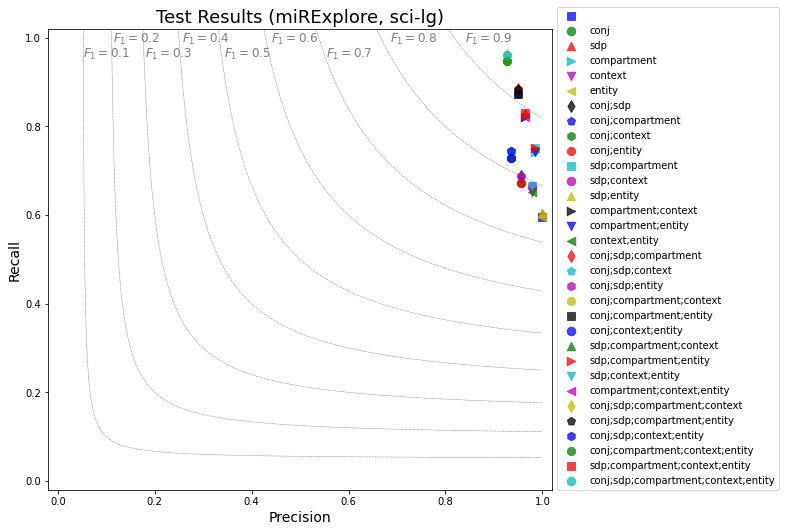

In [85]:
plot_results(results_test_scilg_bionlp_subseti, "Test Results (miRExplore, sci-lg)", "interaction", fontsizes=rules_fontsizes)

<ipython-input-82-f54f4b448d8b>:28: RuntimeWarning: divide by zero encountered in double_scalars
  return f * p / (2 * p - f)


0 1.0 0.48866498740554154 0.6565143824027072 
1 0.9639175257731959 0.5067750677506775 0.6642984014209592 conj
2 0.9020618556701031 0.5043227665706052 0.6469500924214417 sdp
3 0.9072164948453608 0.5925925925925926 0.7169042769857433 compartment
4 0.9587628865979382 0.6326530612244898 0.7622950819672131 context
5 0.9896907216494846 0.4860759493670886 0.6519524617996605 entity
6 0.8711340206185567 0.52 0.651252408477842 conj;sdp
7 0.8711340206185567 0.6282527881040892 0.7300215982721382 conj;compartment
8 0.9226804123711341 0.6392857142857142 0.7552742616033755 conj;context
9 0.9536082474226805 0.5040871934604905 0.6595365418894831 conj;entity
10 0.8350515463917526 0.6303501945525292 0.7184035476718403 sdp;compartment
11 0.865979381443299 0.6588235294117647 0.7483296213808464 sdp;context
12 0.8969072164948454 0.5028901734104047 0.6444444444444445 sdp;entity
13 0.8711340206185567 0.7511111111111111 0.8066825775656324 compartment;context
14 0.9020618556701031 0.5912162162162162 0.7142857142

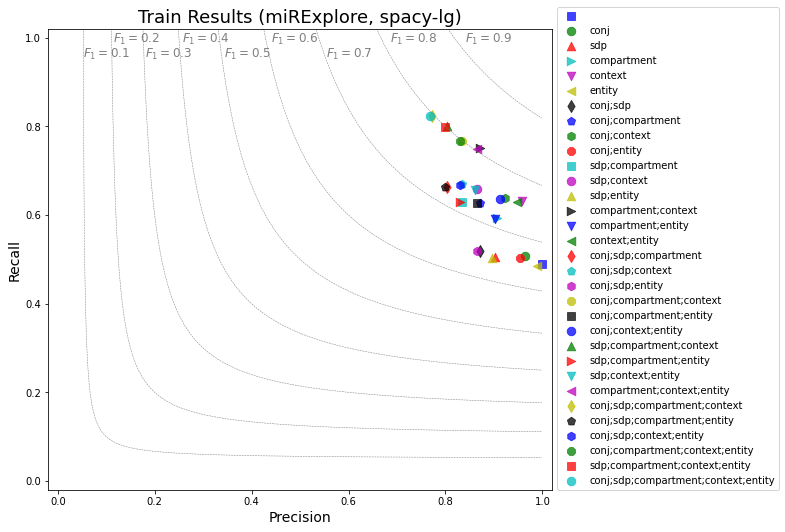

In [86]:
plot_results(results_train_spcylg_bionlp_subseti, "Train Results (miRExplore, spacy-lg)", "interaction", fontsizes=rules_fontsizes)

<ipython-input-82-f54f4b448d8b>:28: RuntimeWarning: divide by zero encountered in double_scalars
  return f * p / (2 * p - f)


0 1.0 0.5948275862068966 0.745945945945946 
1 0.9855072463768116 0.6238532110091743 0.7640449438202247 conj
2 0.8913043478260869 0.5857142857142857 0.7068965517241379 sdp
3 0.855072463768116 0.6982248520710059 0.7687296416938111 compartment
4 0.9855072463768116 0.6415094339622641 0.7771428571428571 context
5 1.0 0.5948275862068966 0.745945945945946 entity
6 0.8768115942028986 0.6173469387755102 0.7245508982035929 conj;sdp
7 0.8405797101449275 0.7483870967741936 0.7918088737201365 conj;compartment
8 0.9710144927536232 0.6733668341708543 0.795252225519288 conj;context
9 0.9855072463768116 0.6238532110091743 0.7640449438202247 conj;entity
10 0.7681159420289855 0.6794871794871795 0.7210884353741496 sdp;compartment
11 0.8768115942028986 0.6335078534031413 0.7355623100303952 sdp;context
12 0.8913043478260869 0.5857142857142857 0.7068965517241379 sdp;entity
13 0.8478260869565217 0.7697368421052632 0.806896551724138 compartment;context
14 0.855072463768116 0.6982248520710059 0.7687296416938111

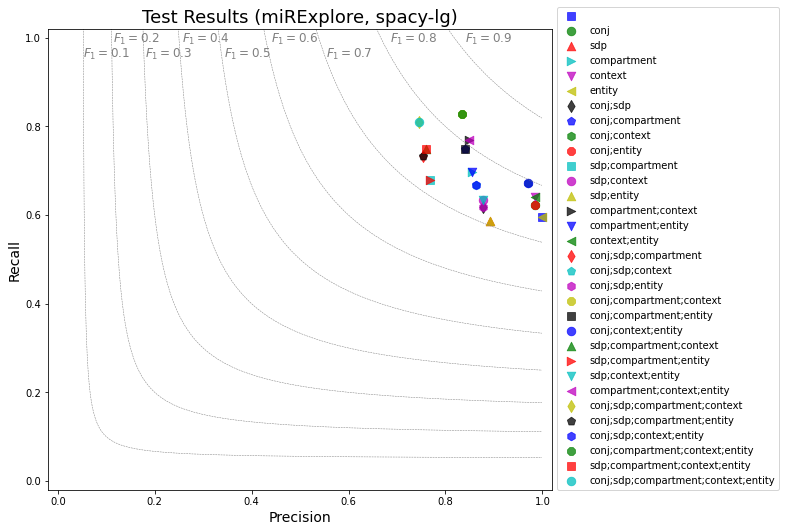

In [87]:
plot_results(results_test_spcylg_bionlp_subseti, "Test Results (miRExplore, spacy-lg)", "interaction", fontsizes=rules_fontsizes)

<ipython-input-82-f54f4b448d8b>:28: RuntimeWarning: divide by zero encountered in double_scalars
  return f * p / (2 * p - f)


0 1.0 0.48866498740554154 0.6565143824027072 
1 0.979381443298969 0.521978021978022 0.6810035842293907 conj
2 1.0 0.5173333333333333 0.6818980667838314 sdp
3 0.9278350515463918 0.5921052631578947 0.7228915662650602 compartment
4 0.9587628865979382 0.636986301369863 0.7654320987654322 context
5 0.9896907216494846 0.4860759493670886 0.6519524617996605 entity
6 0.979381443298969 0.5539358600583091 0.7076350093109869 conj;sdp
7 0.9072164948453608 0.6376811594202898 0.7489361702127658 conj;compartment
8 0.9432989690721649 0.6606498194945848 0.7770700636942675 conj;context
9 0.9690721649484536 0.5193370165745856 0.6762589928057554 conj;entity
10 0.9278350515463918 0.6206896551724138 0.7438016528925618 sdp;compartment
11 0.9587628865979382 0.6595744680851063 0.7815126050420167 sdp;context
12 0.9896907216494846 0.514745308310992 0.6772486772486773 sdp;entity
13 0.8917525773195877 0.7554585152838428 0.817966903073286 compartment;context
14 0.9226804123711341 0.5907590759075908 0.720321931589537

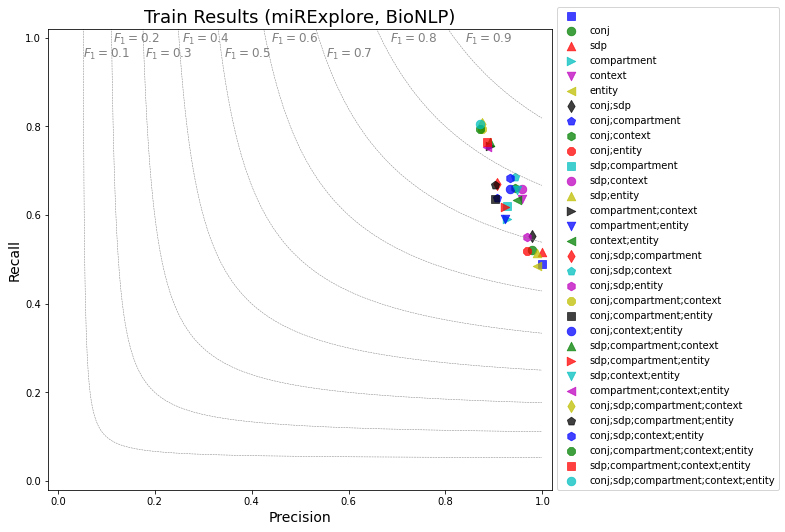

In [88]:
plot_results(results_train_bionlp_bionlp_subseti, "Train Results (miRExplore, BioNLP)", "interaction", fontsizes=rules_fontsizes)

<ipython-input-82-f54f4b448d8b>:28: RuntimeWarning: divide by zero encountered in double_scalars
  return f * p / (2 * p - f)


0 1.0 0.5948275862068966 0.745945945945946 
1 0.9130434782608695 0.6237623762376238 0.7411764705882353 conj
2 1.0 0.6079295154185022 0.7561643835616438 sdp
3 0.9057971014492754 0.7062146892655368 0.7936507936507937 compartment
4 0.9782608695652174 0.6490384615384616 0.7803468208092486 context
5 1.0 0.5948275862068966 0.745945945945946 entity
6 0.9130434782608695 0.6395939086294417 0.7522388059701492 conj;sdp
7 0.8260869565217391 0.7651006711409396 0.794425087108014 conj;compartment
8 0.8913043478260869 0.6721311475409836 0.7663551401869158 conj;context
9 0.9130434782608695 0.6237623762376238 0.7411764705882353 conj;entity
10 0.9057971014492754 0.7142857142857143 0.7987220447284344 sdp;compartment
11 0.9782608695652174 0.6617647058823529 0.7894736842105263 sdp;context
12 1.0 0.6079295154185022 0.7561643835616438 sdp;entity
13 0.8840579710144928 0.7721518987341772 0.8243243243243245 compartment;context
14 0.9057971014492754 0.7062146892655368 0.7936507936507937 compartment;entity
15 0.97

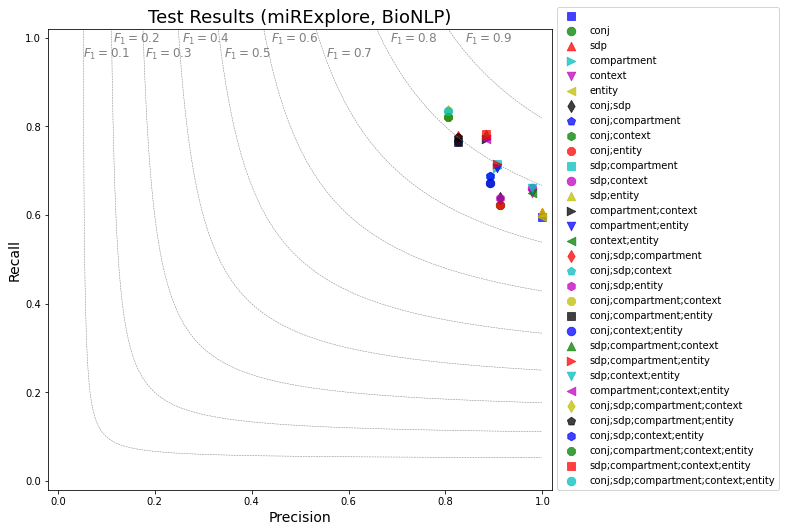

In [89]:
plot_results(results_test_bionlp_bionlp_subseti, "Test Results (miRExplore, BioNLP)", "interaction", fontsizes=rules_fontsizes)

In [16]:
all_runs

{(('ProMiner',),): {'allruns': {'precision': 0.41, 'recall': 0.45}},
 (('miRTex',),): {'allruns': {'precision': 0.92, 'recall': 0.82}},
 (('ReLeX',),): {'allruns': {'precision': 0.45, 'recall': 0.84}},
 (('miRSel',),): {'allruns': {'precision': 0.55, 'recall': 1.0}},
 (('miRExplore/atheMir',),): {'allruns': {'precision': 0.72, 'recall': 0.77}},
 (('miRExplore/sci-lg',),): {'allruns': {'precision': 0.927536231884058,
   'recall': 0.9624060150375939,
   'specificity': 0.898989898989899,
   'f1': 0.9446494464944649}},
 (('miRExplore/BioNLP',),): {'allruns': {'precision': 0.8043478260869565,
   'recall': 0.8345864661654135,
   'specificity': 0.7272727272727273,
   'f1': 0.8191881918819188}},
 (('miRExplore/spacy-lg',),): {'allruns': {'precision': 0.7463768115942029,
   'recall': 0.8110236220472441,
   'specificity': 0.6666666666666666,
   'f1': 0.7773584905660377}}}

<ipython-input-7-9012e0939d61>:28: RuntimeWarning: divide by zero encountered in double_scalars
  return f * p / (2 * p - f)


0 0.72 0.77 0.7441610738255033 miRExplore/atheMir
1 0.8043478260869565 0.8345864661654135 0.8191881918819188 miRExplore/BioNLP
2 0.927536231884058 0.9624060150375939 0.9446494464944649 miRExplore/sci-lg
3 0.7463768115942029 0.8110236220472441 0.7773584905660377 miRExplore/spacy-lg
4 0.55 1.0 0.7096774193548387 miRSel
5 0.92 0.82 0.8671264367816092 miRTex
6 0.41 0.45 0.4290697674418605 ProMiner
7 0.45 0.84 0.586046511627907 ReLeX
\begin{table}
\begin{tabular}{@{}lrrr@{}}
\toprule
\textbf{Rules enabled}&\textbf{Precision}&\textbf{Recall}&\textbf{$F_1$}\\ \midrule
miRExplore/atheMir&0.720&0.770&0.744\\
miRExplore/BioNLP&0.804&0.835&0.819\\
miRExplore/sci-lg&0.928&0.962&0.945\\
miRExplore/spacy-lg&0.746&0.811&0.777\\
miRSel&0.550&1.000&0.710\\
miRTex&0.920&0.820&0.867\\
ProMiner&0.410&0.450&0.429\\
ReLeX&0.450&0.840&0.586\\
\end{tabular}
\end{table}


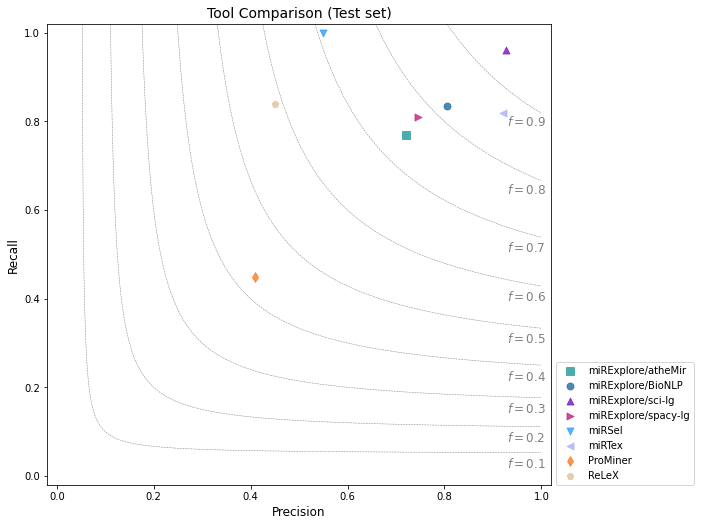

In [17]:
test2col = {
    "miRExplore/sci-lg": "#6c05c4",
    "miRExplore/BioNLP": "#126199",
    "miRExplore/spacy-lg": "#bd1273",
    "miRExplore/atheMir": "#0e9090",
    "miRSel": "#2397f5",
    "ProMiner": "#fe6d13",
    "miRTex": "#a7abf4",
    "ReLeX": "#dbbd94"
}

plot_results(all_runs, "Tool Comparison (Test set)", "allruns", figsize=(10,8), test2color = test2col)

In [18]:
import pickle

with open("scai_test_f1.pickle", "rb") as fout:
    test_results = pickle.load( fout)

In [19]:
test_results[()]

{'GENE_MIR_NEU': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 4},
 'GENE_MIR_UP': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 1},
 'MIR_GENE_DOWN': {'precision': 0.40625,
  'recall': 1.0,
  'f1-score': 0.5777777777777777,
  'support': 52},
 'MIR_GENE_NEU': {'precision': 1.0,
  'recall': 0.12345679012345678,
  'f1-score': 0.21978021978021975,
  'support': 81},
 'accuracy': 0.4492753623188406,
 'macro avg': {'precision': 0.3515625,
  'recall': 0.2808641975308642,
  'f1-score': 0.19938949938949938,
  'support': 138},
 'weighted avg': {'precision': 0.740036231884058,
  'recall': 0.4492753623188406,
  'f1-score': 0.3467147988887119,
  'support': 138}}

In [20]:
classify_dict = {}

for test in test_results:
    
    testdata = test_results[test]
    
    newdata = testdata["weighted avg"]
    
    classify_dict[test] = newdata

In [21]:
classify_dict

{(): {'precision': 0.740036231884058,
  'recall': 0.4492753623188406,
  'f1-score': 0.3467147988887119,
  'support': 138},
 ('compartment',): {'precision': 0.755872063968016,
  'recall': 0.5362318840579711,
  'f1-score': 0.48400302853658694,
  'support': 138},
 ('between',): {'precision': 0.7619047619047619,
  'recall': 0.5652173913043478,
  'f1-score': 0.5242035923000432,
  'support': 138},
 ('counts',): {'precision': 0.6903221942747635,
  'recall': 0.427536231884058,
  'f1-score': 0.34394338392502666,
  'support': 138},
 ('return',): {'precision': 0.3687370600414079,
  'recall': 0.5942028985507246,
  'f1-score': 0.45503874516856174,
  'support': 138},
 ('compartment', 'between'): {'precision': 0.7619047619047619,
  'recall': 0.5652173913043478,
  'f1-score': 0.5242035923000432,
  'support': 138},
 ('compartment', 'counts'): {'precision': 0.7331099272498138,
  'recall': 0.5144927536231884,
  'f1-score': 0.4788698955365622,
  'support': 138},
 ('compartment', 'return'): {'precision': 0

In [22]:
def transformres(indata, slot):
    outdata = defaultdict(lambda: defaultdict(lambda: dict()))
    
    for x in indata:       
        outdata[tuple(reversed(x))][slot] = indata[x][slot]["weighted avg"]
        
    return outdata
        

transformres(results_test_scilg_bionlp_subsetc, slot="regulation")

defaultdict(<function __main__.transformres.<locals>.<lambda>()>,
            {((),
              ('conj',
               'sdp',
               'compartment',
               'context',
               'entity')): defaultdict(<function __main__.transformres.<locals>.<lambda>.<locals>.<lambda>()>,
                         {'regulation': {'precision': 0.740036231884058,
                           'recall': 0.4492753623188406,
                           'f1-score': 0.3467147988887119,
                           'support': 138}}),
             (('compartment',),
              ('conj',
               'sdp',
               'compartment',
               'context',
               'entity')): defaultdict(<function __main__.transformres.<locals>.<lambda>.<locals>.<lambda>()>,
                         {'regulation': {'precision': 0.773567977915804,
                           'recall': 0.6159420289855072,
                           'f1-score': 0.5894246138747589,
                           'support'

<ipython-input-82-f54f4b448d8b>:28: RuntimeWarning: divide by zero encountered in double_scalars
  return f * p / (2 * p - f)


0 0.740036231884058 0.4492753623188406 0.5591134364272549 
1 0.773567977915804 0.6159420289855072 0.6858144633851745 compartment
2 0.7204679439941047 0.5072463768115942 0.5953416817034033 between
3 0.8462428449640725 0.7971014492753623 0.8209374024959951 counts
4 0.3687370600414079 0.5942028985507246 0.45507433339877035 return
5 0.7660214181953313 0.644927536231884 0.7002780708507247 compartment;between
6 0.8961774277714841 0.8478260869565217 0.8713315029353674 compartment;counts
7 0.6813664596273292 0.6231884057971014 0.6509801756794987 compartment;return
8 0.8885231297394781 0.855072463768116 0.871476923307542 between;counts
9 0.7673228477926934 0.6521739130434783 0.7050779656838991 between;return
10 0.892410529429163 0.8478260869565217 0.869547186860295 counts;return
11 0.8940729165933464 0.8695652173913043 0.8816487862219666 compartment;between;counts
12 0.7673228477926934 0.6521739130434783 0.7050779656838991 compartment;between;return
13 0.9382425904165036 0.8985507246376812 0.91

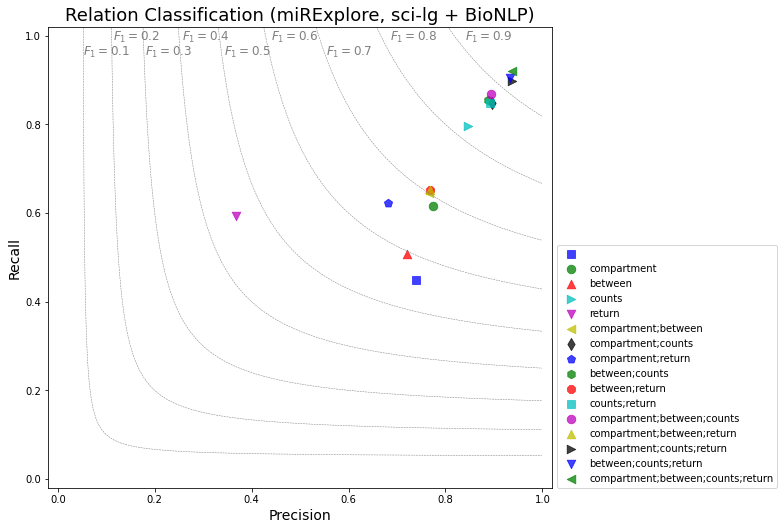

In [90]:
plot_results(transformres(results_test_scilg_bionlp_subsetc, slot="regulation"), "Relation Classification (miRExplore, sci-lg + BioNLP)", slot="regulation", fontsizes=rules_fontsizes)